In [ ]:
import pandas as pd


dataset = pd.read_excel('FINAL jester 2006-15.xls', header=None)
print(dataset.head())


   0    1    2    3    4        5    6        7        8    9    ...   141  \
0   62   99   99   99   99  0.21875   99 -9.28125 -9.28125   99  ...  99.0   
1   34   99   99   99   99 -9.68750   99  9.93750  9.53125   99  ...  99.0   
2   18   99   99   99   99 -9.84375   99 -9.84375 -7.21875   99  ...  99.0   
3   82   99   99   99   99  6.90625   99  4.75000 -5.90625   99  ...  99.0   
4   27   99   99   99   99 -0.03125   99 -9.09375 -0.40625   99  ...  99.0   

    142   143   144   145   146   147   148   149   150  
0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  
1  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  
2  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  
3  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  
4  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  

[5 rows x 151 columns]


In [ ]:
dataset.fillna(0, inplace=True)


In [ ]:

print(dataset.head())


print("Dataset shape:", dataset.shape)


print(dataset.isnull().sum())


print(dataset.columns)


   0    1    2    3    4        5    6        7        8    9    ...   141  \
0   62   99   99   99   99  0.21875   99 -9.28125 -9.28125   99  ...  99.0   
1   34   99   99   99   99 -9.68750   99  9.93750  9.53125   99  ...  99.0   
2   18   99   99   99   99 -9.84375   99 -9.84375 -7.21875   99  ...  99.0   
3   82   99   99   99   99  6.90625   99  4.75000 -5.90625   99  ...  99.0   
4   27   99   99   99   99 -0.03125   99 -9.09375 -0.40625   99  ...  99.0   

    142   143   144   145   146   147   148   149   150  
0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  
1  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  
2  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  
3  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  
4  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  99.0  

[5 rows x 151 columns]
Dataset shape: (54905, 151)
0      0
1      0
2      0
3      0
4      0
      ..
146    0
147    0
148    0
149    0
150    0
Length: 151, dtype: int64
Index(

In [ ]:

dataset.fillna(0, inplace=True)

dataset.dropna(thresh=int(0.8 * dataset.shape[1]), inplace=True)


In [ ]:
dataset.columns = ['User_ID'] + [f'Joke_{i}' for i in range(1, dataset.shape[1])]


In [ ]:
active_users = dataset[dataset.iloc[:, 1:].count(axis=1) > 50]
print(active_users.shape)


(54905, 151)


In [ ]:
user_item_matrix = active_users.iloc[:, 1:].copy()  # Exclude 'User_ID'


In [ ]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Train Data Shape: (43924, 150)
Test Data Shape: (10981, 150)


In [ ]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Train Data Shape: (43924, 150)
Test Data Shape: (10981, 150)


In [ ]:
# Keep only users with more than a certain number of ratings
active_users = train_data.loc[train_data.count(axis=1) > 50]  # Adjust threshold as needed
train_data = active_users


In [ ]:
print('hasan')

hasan


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
train_data_normalized = scaler.fit_transform(train_data.fillna(0))

# Perform K-Means clustering
n_clusters = 10  # Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
user_clusters = kmeans.fit_predict(train_data_normalized)

# Choose a specific cluster (e.g., cluster 0) and focus on users in that cluster
cluster_0_users = train_data[user_clusters == 0]

print("Cluster 0 Users Shape:", cluster_0_users.shape)

# Compute similarity within this cluster
user_similarity = cosine_similarity(cluster_0_users.fillna(0))
print("User-User Similarity Matrix Shape:", user_similarity.shape)


Cluster 0 Users Shape: (17787, 150)
User-User Similarity Matrix Shape: (17787, 17787)


In [ ]:
def predict_ratings_for_test(test_data, user_similarity, train_data, k):
    """
    Predict ratings only for the test data using K most similar users.

    Parameters:
    - test_data: Test dataset (subset of users from the user-item matrix).
    - user_similarity: Precomputed similarity matrix for all users in train_data.
    - train_data: Training dataset (full user-item matrix).
    - k: Number of most similar users to consider.

    Returns:
    - predictions: Predicted ratings for users in the test dataset.
    """
    predictions = []

    for user_id in test_data.index:  # Iterate over test user indices
        # Find the index of the user in the train_data
        try:
            user_idx = train_data.index.get_loc(user_id)  # Get the position of user in train_data
        except KeyError:
            predictions.append(np.zeros(test_data.shape[1]))  # If user not found, append zeros
            continue

        # Get K most similar users from the similarity matrix
        similar_users = np.argsort(user_similarity[user_idx])[-(k + 1):-1]  # Exclude self

        # Predict ratings for this user
        weighted_ratings = np.dot(user_similarity[user_idx, similar_users], train_data.iloc[similar_users].fillna(0))
        similarity_sum = np.sum(user_similarity[user_idx, similar_users])
        predicted_ratings = weighted_ratings / similarity_sum if similarity_sum != 0 else 0
        predictions.append(predicted_ratings)

    return np.array(predictions)


In [ ]:
predicted_ratings_test = predict_ratings_for_test(test_data, user_similarity, train_data, k=5)


In [ ]:
mae = evaluate_predictions(predicted_ratings_test, test_data)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 92.19930813190932


In [ ]:
import numpy as np

def random_recommender(test_data, train_data, k):
    """
    Predict ratings using a random baseline.

    Parameters:
    - test_data: Test dataset (subset of users from the user-item matrix).
    - train_data: Training dataset (full user-item matrix).
    - k: Number of random users to consider.

    Returns:
    - random_predictions: Randomly predicted ratings for test users.
    """
    random_predictions = []

    for user_id in test_data.index:  # Iterate over test user indices
        # Select K random users
        random_users = np.random.choice(train_data.index, k, replace=False)

        # Average their ratings
        random_ratings = np.mean(train_data.loc[random_users].fillna(0), axis=0)
        random_predictions.append(random_ratings)

    return np.array(random_predictions)

# Generate predictions with the random recommender
random_predictions_test = random_recommender(test_data, train_data, k=5)

# Evaluate the random recommender
random_mae = evaluate_predictions(random_predictions_test, test_data)
print(f"Random Recommender MAE: {random_mae}")


Random Recommender MAE: 3.7237651302229713


K=3, MAE=92.19930813190932
K=5, MAE=92.19930813190932
K=10, MAE=92.19930813190932
K=20, MAE=92.19930813190932
K=50, MAE=92.19930813190932


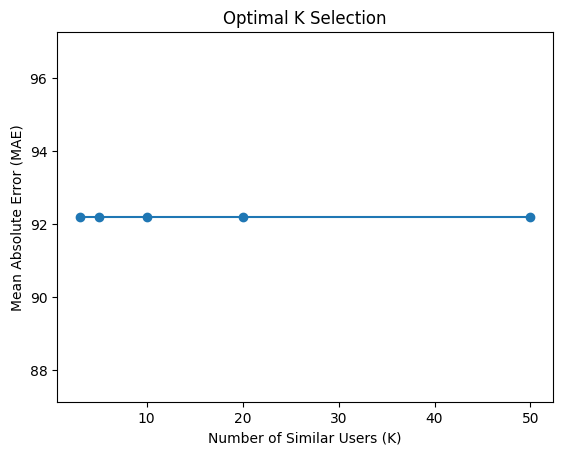

In [ ]:
k_values = [3, 5, 10, 20, 50]  # Test different K values
mae_scores = []

for k in k_values:
    predicted_ratings_test = predict_ratings_for_test(test_data, user_similarity, train_data, k)
    mae = evaluate_predictions(predicted_ratings_test, test_data)
    mae_scores.append(mae)
    print(f"K={k}, MAE={mae}")

# Plot MAE vs K
import matplotlib.pyplot as plt

plt.plot(k_values, mae_scores, marker='o')
plt.xlabel('Number of Similar Users (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Optimal K Selection')
plt.show()


In [ ]:
print(np.unique(predicted_ratings_test))


[0.]


In [ ]:
print("User Similarity Matrix Sample:\n", user_similarity[:5, :5])
print("User Similarity Matrix Min:", user_similarity.min())
print("User Similarity Matrix Max:", user_similarity.max())


User Similarity Matrix Sample:
 [[1.         0.99994079 0.9799114  0.98085865 0.98953578]
 [0.99994079 1.         0.98000645 0.98085891 0.98955739]
 [0.9799114  0.98000645 1.         0.96604904 0.96890075]
 [0.98085865 0.98085891 0.96604904 1.         0.96978714]
 [0.98953578 0.98955739 0.96890075 0.96978714 1.        ]]
User Similarity Matrix Min: 0.7908595014637931
User Similarity Matrix Max: 1.0000000000000042


In [ ]:
# Normalize similarity matrix to make it relative
user_similarity_normalized = (user_similarity - user_similarity.min()) / (user_similarity.max() - user_similarity.min())
print("Normalized User Similarity Matrix Sample:\n", user_similarity_normalized[:5, :5])


Normalized User Similarity Matrix Sample:
 [[1.         0.99971691 0.90394686 0.90847614 0.94996558]
 [0.99971691 1.         0.90440133 0.90847738 0.95006895]
 [0.90394686 0.90440133 1.         0.83766436 0.85129971]
 [0.90847614 0.90847738 0.83766436 1.         0.85553798]
 [0.94996558 0.95006895 0.85129971 0.85553798 1.        ]]


In [ ]:
# Compute overlap between users
overlap = train_data.T.dot(train_data.notnull())
print("Overlap Matrix Sample:\n", overlap.iloc[:5, :5])

# Check average overlap
avg_overlap = overlap.mean().mean()
print(f"Average Ratings Overlap: {avg_overlap}")


Overlap Matrix Sample:
                Joke_1         Joke_2         Joke_3         Joke_4  \
Joke_1      1408671.0      1408671.0      1408671.0      1408671.0   
Joke_2      1408671.0      1408671.0      1408671.0      1408671.0   
Joke_3      1408671.0      1408671.0      1408671.0      1408671.0   
Joke_4      1408671.0      1408671.0      1408671.0      1408671.0   
Joke_5  1398649.71875  1398649.71875  1398649.71875  1398649.71875   

               Joke_5  
Joke_1      1408671.0  
Joke_2      1408671.0  
Joke_3      1408671.0  
Joke_4      1408671.0  
Joke_5  1398649.71875  
Average Ratings Overlap: 1307519.1052083352


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load Dataset (replace 'path_to_dataset' with actual file path)
dataset = pd.read_excel('FINAL jester 2006-15.xls', header=None)

# Data Preprocessing
# Assuming the first column is user ID and the rest are joke ratings
dataset.columns = ['User_ID'] + [f'Joke_{i}' for i in range(1, dataset.shape[1])]
dataset.set_index('User_ID', inplace=True)

# Fill missing values with 0 (or another approach if needed)
dataset.fillna(0, inplace=True)

# Split into train and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Compute User-User Similarity Matrix
normalized_train_data = train_data.sub(train_data.mean(axis=1), axis=0).fillna(0)
user_similarity = cosine_similarity(normalized_train_data)

# Regularized Prediction Function
def predict_with_regularization(user_item_matrix, user_similarity, k, lambda_reg=0.1):
    """
    Predict ratings using a regularized collaborative filtering approach.
    """
    predictions = np.zeros(user_item_matrix.shape)

    for i in range(user_item_matrix.shape[0]):
        similar_users = np.argsort(user_similarity[i])[-(k + 1):-1]  # Exclude self
        similarity_sum = np.sum(user_similarity[i, similar_users] + lambda_reg)

        if similarity_sum == 0:
            predictions[i] = 0  # Default to zero if no similarities
        else:
            weighted_ratings = np.dot(user_similarity[i, similar_users] + lambda_reg, user_item_matrix.iloc[similar_users].fillna(0))
            predictions[i] = weighted_ratings / similarity_sum

    return predictions

# Generate Predictions
predicted_ratings_test = predict_with_regularization(
    user_item_matrix=test_data,
    user_similarity=user_similarity,
    k=5,
    lambda_reg=0.1
)

# Evaluation Function
def evaluate_predictions(predictions, test_data):
    """
    Evaluate predictions using Mean Absolute Error (MAE).
    """
    mae_list = []
    for i in range(test_data.shape[0]):
        actual_ratings = test_data.iloc[i].values
        predicted_ratings = predictions[i]
        mae_list.append(mean_absolute_error(actual_ratings, predicted_ratings))

    return np.mean(mae_list)

# Evaluate MAE
mae = evaluate_predictions(predicted_ratings_test, test_data)
print(f"Mean Absolute Error (MAE): {mae}")
